1. All libs for behavioral cloning project.

In [1]:
import csv
import cv2
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import Cropping2D, ELU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Lambda

Using TensorFlow backend.


2.  Prepare datasets.

In [2]:

lines = []
with open("./mine_data/driving_log.csv") as csv_file:
    reader = csv.reader(csv_file)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
for line in lines:
    correction = 0.1
    measurement = float(line[3])
    
    # center
    source_path = line[0]
    file_name = source_path.split('\\')[-1]
    current_path = './mine_data/IMG/' + file_name
    image_center = cv2.imread(current_path)
    flip_image_center = cv2.flip(image_center,1)
    measurement_center = measurement
    flip_measurement_center = measurement_center*-1
    
    # left
    source_path = line[1]
    file_name = source_path.split('\\')[-1]
    current_path = './mine_data/IMG/' + file_name
    image_left = cv2.imread(current_path)
    flip_image_left = cv2.flip(image_left,1)
    measurement_left = measurement + correction
    flip_measurement_left = measurement_left*-1
    
    # right
    source_path = line[2]
    file_name = source_path.split('\\')[-1]
    current_path = './mine_data/IMG/' + file_name
    image_right = cv2.imread(current_path)
    flip_image_right = cv2.flip(image_right,1)
    measurement_right = measurement - correction
    flip_measurement_right = measurement_right*-1
    
    images.extend([image_center,flip_image_center,image_left,flip_image_left,image_right,flip_image_right])  
    measurements.extend([measurement_center,flip_measurement_center,measurement_left,flip_measurement_left,measurement_right, flip_measurement_right])
    
X_train = np.array(images)
y_train = np.array(measurements)

'''
hsv = cv2.cvtColor(image_center, cv2.COLOR_BGR2HSV) #convert it to hsv
hsv[:,:,2] = hsv[:,:,2]*(0.25+np.random.uniform())
image_center = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
'''



'\nhsv = cv2.cvtColor(image_center, cv2.COLOR_BGR2HSV) #convert it to hsv\nhsv[:,:,2] = hsv[:,:,2]*(0.25+np.random.uniform())\nimage_center = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)\n'

[   36    59   142   272   335   528  1319   960  1704 20519 20504 20702
  1341  1190   746   439   272   167    46    49]
[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


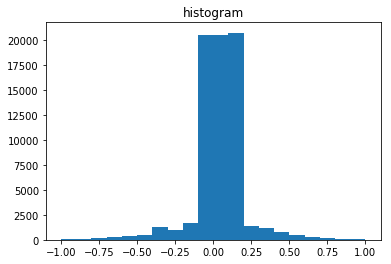

In [6]:
# measurements with augmentation histogram
from matplotlib import pyplot as plt 

hist,bins = np.histogram(y_train,bins =  [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])  

print(hist)
print(bins)
plt.hist(y_train, bins) 
plt.title("histogram") 
plt.show()

3. Construct model,

In [4]:
model = Sequential()          
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))


model.add(Conv2D(24,(5,5),strides=(2,2),activation='relu'))
model.add(Conv2D(36,(5,5),strides=(2,2),activation='relu'))
model.add(Conv2D(48,(5,5),strides=(2,2),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(100))
model.add(Dropout(.2))
model.add(Dense(50))
model.add(Dropout(.2))
model.add(Dense(20))
model.add(Dropout(.2))
model.add(Dense(10))
model.add(Dropout(.2))
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam')    


training & validation.

In [5]:
history_obj = model.fit(X_train,y_train,validation_split=0.2,shuffle=True,epochs=15)

Train on 57100 samples, validate on 14276 samples
Epoch 1/15
57100/57100 [==============================] - 186s 3ms/step - loss: 0.0190 - val_loss: 0.0163
Epoch 2/15
57100/57100 [==============================] - 85s 1ms/step - loss: 0.0166 - val_loss: 0.0162
Epoch 3/15
57100/57100 [==============================] - 83s 1ms/step - loss: 0.0159 - val_loss: 0.0159
Epoch 4/15
57100/57100 [==============================] - 84s 1ms/step - loss: 0.0153 - val_loss: 0.0174
Epoch 5/15
57100/57100 [==============================] - 83s 1ms/step - loss: 0.0146 - val_loss: 0.0168
Epoch 6/15
57100/57100 [==============================] - 121s 2ms/step - loss: 0.0143 - val_loss: 0.0169
Epoch 7/15
57100/57100 [==============================] - 153s 3ms/step - loss: 0.0138 - val_loss: 0.0183
Epoch 8/15
57100/57100 [==============================] - 153s 3ms/step - loss: 0.0135 - val_loss: 0.0189
Epoch 9/15
57100/57100 [==============================] - 154s 3ms/step - loss: 0.0132 - val_loss: 0.0186


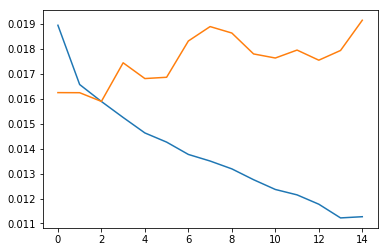

In [7]:
plt.plot(history_obj.history['loss'])
plt.plot(history_obj.history['val_loss'])
plt.show()


5. save model

In [8]:
model.save("model_16.h5")


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 37, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 33, 64)         36928     
__________

In [11]:
# model-2

model_2 = Sequential()          
model_2.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model_2.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))


model_2.add(Conv2D(24,(5,5),strides=(2,2),activation='sigmoid'))
model_2.add(Conv2D(36,(5,5),strides=(2,2),activation='sigmoid'))
model_2.add(Conv2D(48,(5,5),strides=(2,2),activation='sigmoid'))
model_2.add(Conv2D(64,(3,3),activation='sigmoid'))
model_2.add(Conv2D(64,(3,3),activation='sigmoid'))

model_2.add(Flatten())

model_2.add(Dense(100))

model_2.add(Dense(50))

model_2.add(Dense(10))

model_2.add(Dense(1))


model_2.compile(loss='mse', optimizer='SGD')  

history_object_2 = model.fit(X_train,y_train,batch_size=512,validation_split=0.05,shuffle=True,epochs=5)

model_2.save("track1_model_2.h5")
model_2.summary()




Train on 67043 samples, validate on 3529 samples
Epoch 1/5
67043/67043 [==============================] - 79s 1ms/step - loss: 0.0141 - val_loss: 0.0083
Epoch 2/5
67043/67043 [==============================] - 79s 1ms/step - loss: 0.0136 - val_loss: 0.0083
Epoch 3/5
67043/67043 [==============================] - 79s 1ms/step - loss: 0.0134 - val_loss: 0.0083
Epoch 4/5
67043/67043 [==============================] - 79s 1ms/step - loss: 0.0132 - val_loss: 0.0084
Epoch 5/5
67043/67043 [==============================] - 79s 1ms/step - loss: 0.0131 - val_loss: 0.0083
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_3 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None,

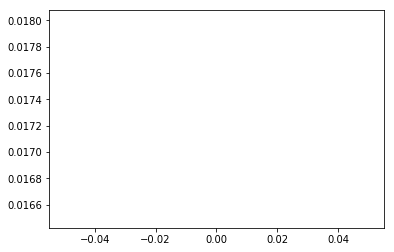

In [1]:
# use generator
import os
import csv

samples = []
with open('./train_data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

import cv2
import numpy as np
import sklearn
from random import shuffle

correction = 0.1
def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            

            images = []
            angles = []
            for batch_sample in batch_samples:                
                
                # ====== center ======
                # cener image
                name = batch_sample[0].split('\\')[-1]
                name = './train_data/IMG/' + name                
                center_image = cv2.imread(name)
                center_angle = float(batch_sample[3])
                images.append(center_image)
                angles.append(center_angle)
                # flip center image
                flip_center_image = cv2.flip(center_image,1)
                flip_center_angle = center_angle*-1
                images.append(flip_center_image)
                angles.append(flip_center_angle)
                
                # ====== left ======
                # left image
                name = batch_sample[1].split('\\')[-1]
                name = './train_data/IMG/' + name                
                left_image = cv2.imread(name)
                left_angle = float(batch_sample[3]) + correction
                images.append(left_image)
                angles.append(left_angle)
                # flip center image
                flip_left_image = cv2.flip(left_image,1)
                flip_left_angle = left_angle*-1
                images.append(flip_left_image)
                angles.append(flip_left_angle)
                
                # ====== right ======
                # right image
                name = batch_sample[2].split('\\')[-1]
                name = './train_data/IMG/' + name                
                right_image = cv2.imread(name)
                right_angle = float(batch_sample[3]) - correction
                images.append(right_image)
                angles.append(right_angle)
                # flip right image
                flip_right_image = cv2.flip(right_image,1)
                flip_right_angle = right_angle*-1
                images.append(flip_right_image)
                angles.append(flip_right_angle)
                

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=128)
validation_generator = generator(validation_samples, batch_size=128)

ch, row, col = 3, 80, 320  # Trimmed image format

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import Cropping2D, ELU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Lambda

model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))


model.add(Conv2D(24,(5,5),strides=(2,2),activation='relu',padding='same'))
model.add(Conv2D(36,(5,5),strides=(2,2),activation='relu',padding='same'))
model.add(Conv2D(48,(5,5),strides=(2,2),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),strides=(1,1),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),strides=(1,1),activation='relu',padding='same'))

model.add(Flatten())


model.add(Dense(100))

model.add(Dense(50))

model.add(Dense(20))

model.add(Dense(10))

model.add(Dense(1))


model.compile(loss='mse', optimizer='adam')
histroy_obj = model.fit_generator(train_generator, samples_per_epoch=len(train_samples), validation_data=validation_generator,nb_val_samples=len(validation_samples), nb_epoch=3)


model.save("track1_model.h5")

Using TensorFlow backend.
D:\Program Files\Anaconda3\envs\term1-gpu\lib\site-packages\ipykernel_launcher.py:119: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
D:\Program Files\Anaconda3\envs\term1-gpu\lib\site-packages\ipykernel_launcher.py:119: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., steps_per_epoch=13427, epochs=3, validation_steps=3357)`


Epoch 1/3
  106/13427 [..............................] - ETA: 6:30:11 - loss: 0.1958

KeyboardInterrupt: 